In [ ]:
!pip install konlpy
!pip install tensorflow
!pip install sklearn
!pip install pykospacing
!pip install tqdm

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [ ]:
### 라이브러리 임폴트
import re
import pandas as pd
from tqdm import tqdm
from konlpy.tag import Okt
from pykospacing import Spacing
from collections import Counter

### 저장된 데이터 불러오기

# 파일 경로 설정
file_path='/content/drive/MyDrive/KDT/kdt 1차 프로젝트/combined_data.xlsx'

# DataFrame 생성
data = pd.read_excel(file_path)
data.columns = ['reviews', 'label','score']
# 결과 확인하기
print(data)

                                                reviews     label     score
0     이번에 새로 출시한 갤럭시 S24  AI를 기반으로 해서 원하는 플레이리스트를 말만...  positive  0.998082
1                                            폴더블4는 안되네ㅜ  positive  0.463356
2                                        울트라는 티타늄 블랙 ㅎㅎ  positive  0.987154
3     갤럭시S4 + SK텔레콤 = 더 완벽해진 AI 능력\n갤럭시S4  스펙보다! \nS...  positive  0.539264
4                      삼성이 계속 새로운 색깔로 뭔가 도?전을 하는거 같긴 한데  positive  0.637464
...                                                 ...       ...       ...
1722                             *#0*# 이거 안되는데요ㅠ 불량인가요?  negative  0.945539
1723                            GPS이슈는 퀄컴 스냅드레곤만 그런건가요?  negative  0.458263
1724          아이폰13프로 배터리 컨디션 85%정도 되는데 저랑 비슷한 수준으로 닳네요  negative  0.648224
1725  폴드3 2년 넘게 쓰다 이번에 s24u로 넘어왔거든요 전체적으로 만족하지만 재부팅 ...  negative  0.738802
1726                    1 에서 멈춰있나요 영상으로좀 다뤄주세요 ㅠㅠ  저도 6  negative  0.619600

[1727 rows x 3 columns]


In [ ]:
data['label'] = data['label'].replace({'positive': 1, 'negative': -1})
display(data)

,reviews,label,score
0,이번에 새로 출시한 갤럭시 S24 AI를 기반으로 해서 원하는 플레이리스트를 말만...,1,0.998082
1,폴더블4는 안되네ㅜ,1,0.463356
2,울트라는 티타늄 블랙 ㅎㅎ,1,0.987154
3,갤럭시S4 + SK텔레콤 = 더 완벽해진 AI 능력\n갤럭시S4 스펙보다! \nS...,1,0.539264
4,삼성이 계속 새로운 색깔로 뭔가 도?전을 하는거 같긴 한데,1,0.637464
...,...,...,...
1722,*#0*# 이거 안되는데요ㅠ 불량인가요?,-1,0.945539
1723,GPS이슈는 퀄컴 스냅드레곤만 그런건가요?,-1,0.458263
1724,아이폰13프로 배터리 컨디션 85%정도 되는데 저랑 비슷한 수준으로 닳네요,-1,0.648224
1725,폴드3 2년 넘게 쓰다 이번에 s24u로 넘어왔거든요 전체적으로 만족하지만 재부팅 ...,-1,0.738802


In [ ]:
data = data.dropna()
data.isna().sum()

data = data.drop_duplicates()
data.duplicated().sum()

data = data.reset_index(drop=True)

In [ ]:
def extract_word(text):
    hangul = re.compile('[^가-힣]')
    result = hangul.sub(' ', text)
    return result

print("Before Extraction : ",data['reviews'][101])
print("After Extraction : ", extract_word(data['reviews'][101]))

print("Before Extraction : ",data['reviews'][400])
print("After Extraction : ", extract_word(data['reviews'][400]))

data['reviews'] = data['reviews'].apply(lambda x:extract_word(x))

spacing = Spacing()

Before Extraction :  현재 Best buy S22  올트라 516GB 를 $649
After Extraction :  현재               올트라       를     
Before Extraction :  7개월뒤 출시하는 아이폰16pro는 애플gtp달고 나온다는데
s24보다 훨씬 성능좋겠죠?
After Extraction :   개월뒤 출시하는 아이폰     는 애플   달고 나온다는데    보다 훨씬 성능좋겠죠 


In [ ]:
okt = Okt()
words = " ".join(data['reviews'].tolist())
words = okt.morphs(words,stem=True)

In [ ]:
remove_one_word = [x for x in words if len(x)>1 or x=="좋"]
len(remove_one_word)

15034

In [ ]:
with open('/content/drive/MyDrive/KDT/kdt 1차 프로젝트/stopwords_s24.txt', 'r') as f:
    list_file = f.readlines()
stopwords = list_file[0].split(",")
remove_stopwords = [x for x in remove_one_word if x not in stopwords]
len(remove_stopwords)

15034

In [ ]:
from collections import Counter
frequent = Counter(remove_one_word).most_common()

frequent

[('하다', 638),
 ('삼성', 317),
 ('갤럭시', 252),
 ('울트라', 240),
 ('되다', 235),
 ('으로', 197),
 ('있다', 161),
 ('출시', 143),
 ('보다', 142),
 ('폴드', 136),
 ('쓰다', 117),
 ('이다', 116),
 ('같다', 115),
 ('너무', 113),
 ('에서', 111),
 ('플러스', 109),
 ('아니다', 106),
 ('좋다', 94),
 ('아이폰', 94),
 ('노트', 86),
 ('없다', 86),
 ('성능', 81),
 ('이번', 78),
 ('인데', 76),
 ('기대', 75),
 ('늘다', 72),
 ('기능', 72),
 ('가다', 70),
 ('시리즈', 65),
 ('나오다', 63),
 ('엑시노스', 63),
 ('카메라', 62),
 ('생각', 60),
 ('받다', 59),
 ('사용', 59),
 ('디자인', 57),
 ('애플', 57),
 ('문제', 57),
 ('오다', 56),
 ('해주다', 53),
 ('진짜', 51),
 ('디스플레이', 50),
 ('텔레콤', 49),
 ('탑재', 49),
 ('불량', 48),
 ('정말', 47),
 ('하고', 47),
 ('않다', 47),
 ('영상', 45),
 ('크다', 42),
 ('배터리', 41),
 ('제품', 40),
 ('이네', 39),
 ('많이', 38),
 ('부터', 38),
 ('정도', 38),
 ('까지', 37),
 ('때문', 37),
 ('실망', 36),
 ('기술', 35),
 ('되어다', 35),
 ('그렇다', 35),
 ('결국', 34),
 ('스냅드래곤', 33),
 ('안되다', 32),
 ('플립', 32),
 ('아직', 32),
 ('기본', 31),
 ('써다', 31),
 ('대박', 31),
 ('역시', 31),
 ('스피커', 31),
 ('지원', 30),
 ('보고', 30

In [ ]:
for item, count in Counter(remove_stopwords).most_common():
    if count==1:
        print(item)

섭외
기획
선보이다
내려가다
초대
박작
짧다
따뜻하다
잘뽑다
증대
갓헬쥐
벤치마크
보관
누락
신경안
나누기
수고
지난해
와는
유기발광다이오드
세트
갤버지
갤버
지켜보다
박스
안함
껀데
허참
주식시장
상하
가만
확장
빛나다
진화
네트워크
무궁무진
공략
본능
이기
가득하다
에어팟
관계
패러다임
등장
당당하다
세운
행보
너무도
급감
주류
비로소
사랑받다
리지
나머지
회장
에게도
배려
파이팅
일과
라이프
펼쳐지다
비주
메시지
걸음
앞서
진보
가나
여서
헤르츠
중시
형태
본연
충실하다
철학
담기다
기호
쿨링
갤탭
와아
박수
까지만
제니
레드
존버중
그란
폼펙터
가져가다
끼리
용기
그러면
하나요
장소
카드슬롯
단자
부활
올트
셀레나
그라파이트
차원
선사
아이덴티티
고속
번작
일반도
독과점
괜히
구형
골치
명기
그닥
강추
신소재
써왓던
께서
대신
각각으로
용달
약체
조루
징징대다
컴퓨터
전자기기
종합
비례
오우
저렴하다
램등
만날
연결하다
높혔는데
반대
과도
완전하다
말고는
옮기다
시인
획기
우월하다
객관
나기
협력
의존
주도하다
연느님
언제나
귀엽다
채널
존버합니
잘나다
실생활
무난
실버
파스텔
다기
독립
개이득
면서
새삼
자랑스럽다
지금껏
평소
직업
두번째
써클
빨리
나름
조기
메다
퀄리티
즐기다
추천
크림
훨훨
그만큼
화두
정점
모니터
시크
척척
춤추다
코퍼
시에라
화판
콘솔
이식
이용자
그치다
하나같이
스스로
망치다
시안
정책
나아가다
일해
구사
괄목
성과
아싸
동그라미
체급
잘생기다
철저하다
커스터
마이
국가
선방
고서
인점
그간
문화
반갑다
볼록하다
유광
측면
평평하다
옆면
다듬어지다
세련
보단
문장
문서
연구
결실
해줘잉
떙기네
색도
자로
대여
급하다
다듬다
고대
순식간
내면
세상
간편하다
공격
벤치
가의
떄문
조금씩
모자라다
빠릿빠릿
민팃
기필코
던지다
만의
토록
어빌리티
동남아
몽골
파키스탄
디판
사정
건너
손좀
긋다
확신
비서
역할
해내다
미뗬다
거릅니
성원
계승
결심
실물
칭찬
리즌
암턴
비슷
재는
노땅폰
장기
아킬레스건
인저
합작
주문
대장
신형
신기

In [ ]:
minimum_count = 3
more_than_one_time= []
for i in tqdm(range(len(remove_stopwords))):
    tmp = remove_stopwords[i]
    if remove_stopwords.count(tmp) >= minimum_count:
        more_than_one_time.append(tmp)

100%|██████████| 15034/15034 [00:15<00:00, 994.07it/s] 


In [ ]:
import time

def make_wordlist(reviews,stopwords): #reviews = " ".join(data['Review'].tolist())
    print("리뷰들을 모아 분석하는 중입니다.....")
    #정규표현식 적용
    print("데이터 정제 중....")
    words = extract_word(reviews)
    #형태소 추출
    print("형태소 추출 중....")
    words = okt.morphs(words,stem=True)
    #한글자 제거
    print("한글자 제거 중....")
    words = [x for x in words if len(x)>1 or x =='좋']
    #불용어 제거
    print("불용어 제거 중....")
    words = [x for x in remove_one_word if x not in stopwords]
    #최소횟수 미만 제거
    print("의미있는 단어리스트 생성 중....")
    time.sleep(1)
    minimum_count = 3
    final = []
    for i in tqdm(range(len(words))):
        tmp = words[i]
        if words.count(tmp) >= minimum_count:
            final.append(tmp)
    return set(final) #조건을 만족하는 단어 리스트

In [ ]:
word_list = make_wordlist(" ".join(data["reviews"].tolist()), stopwords)

리뷰들을 모아 분석하는 중입니다.....
데이터 정제 중....
형태소 추출 중....
한글자 제거 중....
불용어 제거 중....
의미있는 단어리스트 생성 중....


100%|██████████| 15034/15034 [00:06<00:00, 2496.49it/s]


In [ ]:
def preprocess(text, word_list):
    text = extract_word(text)
    okt = Okt()
    text = okt.morphs(text, stem = True)
    return [x for x in text if x in word_list]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(tokenizer = lambda x: preprocess(x,word_list))
data_features = vectorizer.fit_transform(data['reviews'].tolist())
list_of_word = vectorizer.get_feature_names_out()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
count_list = data_features.toarray().sum(axis=0)
count_list

array([  3,  15,   4,   3,   4,  16,  70,   3,   3,   4,   8,   7,  13,
        16,   3,   3,  10,   3,  11,   3,   9,   3, 115,   8,  12,  10,
        24,   9,  10, 252,   3,   5,   4,  15,   4,   3,   9,  11,   4,
         7,  17,   3,   4,   8,   5,  34,   4,   5,  10,   6,  12,   9,
         6,  21,   3,   5,   3,   4,   6,  10,   5,   3,   3,   5,   4,
         3,   3,   5,   6,   7,   4,   3,   9,   6,  10,   3,   3,   6,
         5,  26,  11,   5,   4,   3,   6,  26,   7,   3,   9,   9,   3,
         7,  10,  35,   5,  11,   5,  17,  10,   4,   3,  11,  72,  17,
         9,  75,   4,  18,   3,   7,   3,  31,   4,  35,   3,  21,  11,
         5,   6,  37,   4,   3,   3,   7,  17,   5,   4,   3,   7,   4,
        24,   3,  63,   6,   6,   3,   6,   4,   6,  14,   3,   4,   6,
         5,   9,   6,   4,   4,   5, 113,   5,   5,  24,  13,  18,  29,
         6,   4,   3,   3,   5,   5,  86,   4,   5,   4,   5,  10,   3,
         3,   5,   3,   3,   3,   6,  12,  18,  72,  23,   3,   

In [ ]:
word_count_dict = dict(zip(word_list, count_list))
word_count_dict

{'되어다': 3,
 '처럼': 15,
 '에는': 4,
 '튀다': 3,
 '어케': 4,
 '이어폰': 16,
 '품질': 70,
 '들이다': 3,
 '다음': 3,
 '오랜': 4,
 '유튜브': 8,
 '제외': 7,
 '기기': 13,
 '동일하다': 16,
 '그게': 3,
 '드리다': 3,
 '레이': 10,
 '빠르다': 3,
 '커지다': 11,
 '경쟁': 3,
 '지금': 9,
 '삼성': 3,
 '통역': 115,
 '교체': 8,
 '만족스럽다': 12,
 '이제': 10,
 '개발': 24,
 '이기다': 9,
 '가요': 10,
 '이네': 252,
 '선택': 3,
 '주지': 5,
 '드디어': 4,
 '반사율': 15,
 '적응': 4,
 '취소': 3,
 '디테일': 9,
 '당하다': 11,
 '대화': 4,
 '자다': 7,
 '검증': 17,
 '눈물': 3,
 '치다': 4,
 '차다': 8,
 '진동': 5,
 '이유': 34,
 '쓴다': 4,
 '완전': 5,
 '기업': 10,
 '후기': 6,
 '생각': 12,
 '약정': 9,
 '원하다': 6,
 '이해': 21,
 '리스트': 3,
 '매력': 5,
 '차별': 3,
 '그리고': 4,
 '줄어들다': 6,
 '차라리': 10,
 '그리다': 5,
 '김연아': 3,
 '마다': 3,
 '에선': 5,
 '가능성': 4,
 '전화': 3,
 '너무하다': 3,
 '보이다': 5,
 '어둡다': 6,
 '여러분': 7,
 '오류': 4,
 '본인': 3,
 '대한민국': 9,
 '상태': 6,
 '요약': 10,
 '욕먹다': 3,
 '깨지다': 3,
 '배줌': 6,
 '늘다': 5,
 '아마도': 26,
 '수도': 11,
 '벌써': 5,
 '아무': 4,
 '비율': 3,
 '유저': 6,
 '결함': 26,
 '잘못': 7,
 '으로': 3,
 '모습': 9,
 '제품': 9,
 '기간': 3,
 '높아지다': 7,
 '경우': 10,
 '써다

In [ ]:
data_features[0]

<1x933 sparse matrix of type '<class 'numpy.int64'>'
	with 17 stored elements in Compressed Sparse Row format>

In [ ]:
index = []
i = 0
for x in data_features.toarray()[0]:
    if x==1:
        index.append(i)
    i = i+1

index

[29, 109, 113, 271, 282, 430, 466, 540, 559, 599, 609, 620, 650, 808, 873, 903]

In [ ]:
[list_of_word[x] for x in index]

['갤럭시',
 '기반',
 '기술',
 '리스트',
 '만들다',
 '새롭다',
 '쉬다',
 '엄청나다',
 '에이',
 '요약',
 '원하다',
 '으로',
 '이번',
 '출시',
 '플레이',
 '해주다']

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(data_features)


In [ ]:
vectorizer.vocabulary_

{'이번': 650,
 '새롭다': 430,
 '출시': 808,
 '갤럭시': 29,
 '기반': 109,
 '으로': 620,
 '하다': 882,
 '원하다': 609,
 '플레이': 873,
 '리스트': 271,
 '만들다': 282,
 '쉬다': 466,
 '요약': 599,
 '해주다': 903,
 '에이': 559,
 '기술': 113,
 '엄청나다': 540,
 '더블': 209,
 '늘다': 177,
 '안되다': 512,
 '울트라': 604,
 '티타늄': 851,
 '블랙': 396,
 '텔레콤': 839,
 '완벽하다': 593,
 '능력': 178,
 '스펙': 472,
 '보다': 371,
 '김연아': 118,
 '놀랍다': 166,
 '광고': 69,
 '같다': 22,
 '삼성': 425,
 '계속': 53,
 '색깔': 432,
 '뭔가': 332,
 '한데': 889,
 '플러스': 872,
 '최고': 801,
 '그래서': 89,
 '기대하다': 107,
 '무거워': 322,
 '하아': 885,
 '기능': 102,
 '탑재': 832,
 '되다': 226,
 '그리고': 95,
 '중국산': 767,
 '가가': 0,
 '기본': 111,
 '나오다': 132,
 '아직도': 510,
 '가장': 12,
 '기대': 105,
 '부분': 380,
 '올해': 589,
 '최대': 803,
 '가다': 6,
 '탄생': 831,
 '생각': 434,
 '송해나': 461,
 '모습': 320,
 '시간': 475,
 '이다': 634,
 '정말': 731,
 '인상': 674,
 '으로도': 622,
 '많다': 294,
 '에게': 548,
 '관심': 68,
 '크다': 829,
 '사랑': 414,
 '받다': 348,
 '응원': 627,
 '너무': 149,
 '시리즈': 478,
 '전체': 721,
 '디자인': 241,
 '엄청': 539,
 '해상도': 901,
 '업글': 542,
 '된거': 22

In [ ]:
invert_index_vectorizer = {v: k for k, v in vectorizer.vocabulary_.items()}

In [ ]:
data['label'].value_counts()

label
-1    883
 1    812
Name: count, dtype: int64

In [ ]:
min_cnt = min(data['label'].value_counts().tolist())
positive_random_idx = data[data['label']==1].sample(min_cnt, random_state=40).index.tolist()
negative_random_idx = data[data['label']==-1].sample(min_cnt, random_state=40).index.tolist()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import random

random_idx = positive_random_idx + negative_random_idx
random.shuffle(random_idx)

tf_idf_vect = TfidfVectorizer()

# Fit the vectorizer on the data
tf_idf_vect.fit(data['reviews'])

x = tf_idf_vect.transform(data['reviews'][random_idx])
y = data['label'][random_idx]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

model = LogisticRegression()
model.fit(x, y)

LogisticRegression()

accuracy: 0.97
precision: 0.97
recall: 0.97
F1: 0.97


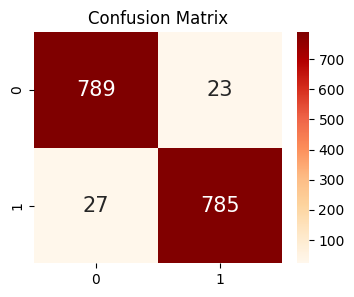

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(x)
print('accuracy: %.2f' % accuracy_score(y, y_pred))
print('precision: %.2f' % precision_score(y, y_pred))
print('recall: %.2f' % recall_score(y, y_pred))
print('F1: %.2f' % f1_score(y, y_pred))

# confusion matrix

confu = confusion_matrix(y_true = y, y_pred = y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
pos_index = sorted(((value, index) for index, value in enumerate(model.coef_[0])), reverse = True)
neg_index = sorted(((value, index) for index, value in enumerate(model.coef_[0])), reverse = False)


In [ ]:
pos_index


[(2.823155335281208, 215),
 (1.9373316473829563, 766),
 (1.9291123365532383, 6705),
 (1.8843563033358124, 760),
 (1.843666709260468, 6706),
 (1.6561164934576176, 6086),
 (1.6321564302000813, 1470),
 (1.502529831120466, 6714),
 (1.3185214042913567, 5551),
 (1.1862187347060469, 5016),
 (1.124645520952643, 1478),
 (0.9767144569080203, 6641),
 (0.9646026651753961, 3703),
 (0.9552844147254805, 1520),
 (0.9281551768274898, 6422),
 (0.8985628534379574, 6121),
 (0.8910939295915791, 4459),
 (0.874486719426515, 6414),
 (0.8703481505219104, 6342),
 (0.8696869635473496, 765),
 (0.8614920152312266, 750),
 (0.8515502688840852, 1669),
 (0.8323979481182721, 7022),
 (0.8184199965248067, 1476),
 (0.7946178821562723, 751),
 (0.7882125998793116, 6032),
 (0.7730011329418608, 1739),
 (0.7589754104302103, 4446),
 (0.7535448070207104, 5149),
 (0.7509145119685364, 4517),
 (0.7365994796336087, 1884),
 (0.7317480218502485, 6735),
 (0.7290018078653561, 4458),
 (0.7213695181744121, 6283),
 (0.7079481474107379, 647

In [ ]:
for coef in pos_index[:110]:
    if coef[1] not in list(invert_index_vectorizer.keys()):
        continue

    else:
        print(invert_index_vectorizer[coef[1]], coef[0])




데이터 2.823155335281208
중국 1.9373316473829563
주지 1.8843563033358124
중간 0.8696869635473496
좋다 0.8614920152312266
좋아지다 0.7946178821562723
이렇게 0.612837685533278
고통 0.578225500891233
너무하다 0.5277862438440888
전체 0.5261615311886949
위기 0.5242541619194154
으로 0.4902989518668903
내년 0.4861090195000338
치명 0.4710688795679419
정신 0.46385333513189697
이라서 0.462891786583135


In [ ]:
for coef in neg_index[:110]:
    if coef[1] not in list(invert_index_vectorizer.keys()):
        continue

    else:
        print(invert_index_vectorizer[coef[1]], coef[0])



반사 -2.1360496405544254
요즘 -1.080319871335473
기다 -0.8156106669258633
이지 -0.6864243148948569
배터리 -0.5143760615995121
부터는 -0.4339072799670558
성능 -0.4248285758034299
모델 -0.4100215263302451
연아 -0.3976045975514417
반사율 -0.38316021634175174
맥북 -0.3811297779376201


In [ ]:
!pip install pytagcloud pygame simplejson

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 754.7/754.7 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 13.3 MB/s eta 0:00:00
  Created wheel for pytagcloud: filename=pytagcloud-0.3.5-py3-none-any.whl size=759869 sha256=8294d0ed594c5b4b86acaaa0e99c253e58c8f906eb5d336faeabcc3b9d56c2e1
  Stored in directory: /root/.cache/pip/wheels/2c/4b/2f/f65774b96585b1dd4ac53d4425a61d5373cc1eb4afdf55be82
Successfully built pytagcloud


In [ ]:
from collections import Counter

import random
import pytagcloud
import webbrowser

ranked_tags = Counter(word_count_dict).most_common(25)
taglist = pytagcloud.make_tags(sorted(word_count_dict.items(),
                                      key=invert_index_vectorizer[coef[1]], reverse=True)[:40], maxsize=60)
pytagcloud.create_tag_image(taglist, 'wordcloud_example.jpg',
                            rectangular=False)

from IPython.display import Image
Image(filename='wordcloud_example.jpg')

TypeError: 'str' object is not callable